<a href="https://colab.research.google.com/github/Matthewm24/personal-project/blob/main/R9_DTreesVControl_DS110_F24.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Decision Tree Decisions

One of the nice things about decision trees is that it's possible to tell, for each data point, exactly the decisions that led to its classification.

Below is a DecisionTree class that has the structure of a decision tree, although we here omit methods that would let us train it.  Code a function print_reasoning() that, given a datapoint represented by a dictionary and a decision tree, prints "[featurename]: [value]" for each node the datapoint encounters as it travels down the tree, followed by the classification when it reaches a leaf node.  Thus the output for the "octopus" dictionary given below should be:

<code>
8 legs: True
Underwater: True
octopus
</code>

We assume all the features here are boolean for convenience, so the object is represented by a dictionary with keys of featurenames and values of True or False.

It is probably easiest to write your function recursively.  Your base case is reaching a leaf and printing the classification.  Your recursive case should print a little of the output and then make a recursive call on the correct branch of the tree.

In [1]:
class DecisionTree:
    def __init__(self, featurename, classification):
        self.featurename = featurename # Is None for leaf
        self.classification = classification # Is None for interior node
        self.yes = None # Link to "yes" branch of tree
        self.no = None # Link to "no" branch of tree

In [2]:
# This sort of tree creation would be done automatically in a
# decision tree learning algorithm
octopus_tree = DecisionTree('8 legs', None)
octopus_tree.yes = DecisionTree('Underwater', None)
octopus_tree.yes.yes = DecisionTree(None, 'octopus')
octopus_tree.yes.no = DecisionTree(None, 'spider')
octopus_tree.no = DecisionTree(None, 'something else')

In [10]:
# TODO print_reasoning()
def print_reasoning(tree, datapoint):
  if tree.featurename == None:
    print(tree.classification)
  elif datapoint[tree.featurename] == True:
      print(tree.featurename + ": True")
      print_reasoning(tree.yes, datapoint)
  elif datapoint[tree.featurename] == False:
    print(tree.featurename + ": False")
    print_reasoning(tree.no, datapoint)
  else:
    print(tree.featurename + ": " + str(datapoint[tree.featurename]))
    print_reasoning(tree.no, datapoint)

In [11]:
octopus = {'8 legs': True, 'Underwater': True}
spider = {'8 legs': True, 'Underwater': False}
print_reasoning(octopus_tree, octopus)
print_reasoning(octopus_tree, spider)

8 legs: True
Underwater: True
octopus
8 legs: True
Underwater: False
spider


# Regression

a) The following list gives monthly gas prices (per gallon) in Massachusetts from the beginning of the pandemic (March 2020) to the end of 2022.  (Source: https://www.eia.gov/dnav/pet/hist/LeafHandler.ashx?n=PET&s=EMM_EPM0_PTE_SMA_DPG&f=M)  Fit a line to the data and plot it alongside the original data points.  (Note that you'll need to create your own x coordinates - try using np.linspace().)

In [30]:
gas_prices = [2.385, 2.015, 2.000, 2.116, 2.178, 2.185, 2.184, 2.160,
              2.142, 2.233, 2.381, 2.538, 2.792, 2.823, 2.943, 3.016,
              3.088, 3.112, 3.162, 3.308, 3.479, 3.447, 3.409, 3.575,
              4.310, 4.171, 4.634, 5.074, 4.728, 4.346, 3.826, 3.700, 3.912, 3.578]

<function matplotlib.pyplot.show(close=None, block=None)>

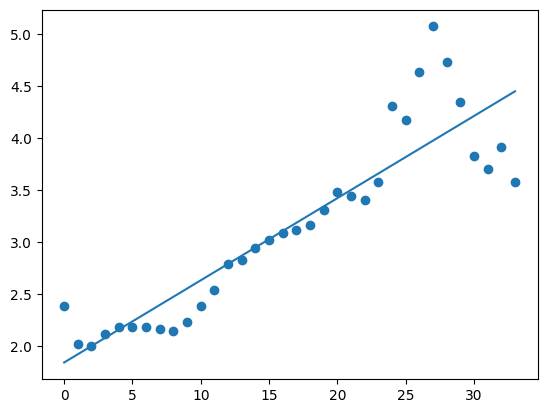

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
y = np.array(gas_prices)
x = np.arange(len(gas_prices))
slope, intercept, r_value, p_value, std_err = linregress(x, y)
plt.scatter(x,y)

plt.plot(x, slope * x + intercept)

plt.show

b) There seems to be an anomaly here where the linear fit isn't great.  We'd like to write code that can automatically find such deviations from the fit.

Find the standard deviation (numpy.std()) of all the distances between the data points and our line, then find all the points that are 1.5 standard deviations away or more and plot them as red points on top of an identical plot to the one above.

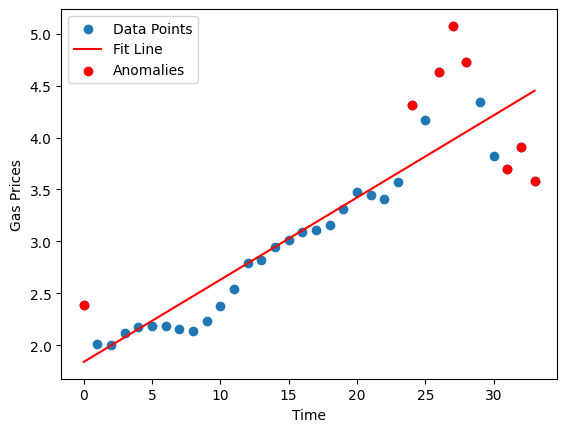

In [38]:
predicted_prices = slope * x + intercept

deviations = np.abs(gas_prices - predicted_prices)
std_dev = np.std(deviations)

anomalies = deviations > 1.5 * std_dev
anomaly_points_x = x[anomalies]
anomaly_points_y = gas_prices[anomalies]

plt.scatter(x, gas_prices, label="Data Points")
plt.plot(x, predicted_prices, color="red", label="Fit Line")
plt.scatter(anomaly_points_x, anomaly_points_y, color="red", label="Anomalies")
plt.xlabel("Time")
plt.ylabel("Gas Prices")
plt.legend()
plt.show()

# Tool focus:  Version Control

Have you ever worked on a project where you needed to pass around a file to modify?  You probably were a little discontent with the process.  Near the end, it may have been hard to determine whether FinalFinal.docx was really your most recent copy, or if there might be a FinalFinalFinal.docx that was more recent.  If you were collaborating, it may have been annoying to try to keep people from working on the same stuff simultaneously.  And if you wanted to go back to an earlier version, you could only hope you saved a separate version around the right time.

*Version control*, and the git/Github software and site in particular, is the programmer's answer to all the aforementioned problems.

* A central server keeps track of a series of versions of the code.  It's always clear what the most recent version is, and it's relatively easy to go back to an earlier version.  If code becomes buggy, this helps determine when the bug was introduced.

* When people get copies to work on locally, on their own machines, they create their own individual histories locally.  People are free to ignore their collaborators' work until they merge their changes back into the central repository.

* When it's time to merge local changes into the central repository, the code is scanned for differences, and any discrepancies resulting from others' changes are highlighted and resolved.

If you become familiar with version control now, it may especially help with the final project, where you will have multiple individuals trying to work with the same files at the same time.

* If you do not already have a github account, go create one now at:  https://github.com/
* Once you've created an account, create a new repository.  If you don't see the big green button immediately, you can click on yourself, then on "Repositories," then "New" in the upper right.
* Name your repository something arbitrary, like "repo_test."  Also make it private (this is what you'd want to do for homework and other sensitive stuff).  Make a README file (because it also sets up a "branch" that you can commit to).  The other options don't really matter right now.
* Assuming you are doing this recitation in Colab, go to File->Save a copy in GitHub.  Choose your notebook and save it to GitHub!  (You might also change the commit message - this is a good habit to get into so that you can find particular versions later.)
* Check the repo on the GitHub website (under your username->Repositories), and verify that your code is now on the web (privately, assuming you chose "private").

* Now let's try going back to an earlier version.  Fill the following code box with junk, and File->Save a copy in GitHub.

* You can now see both versions of the notebook in the GitHub repository history.  (Repositories->your_repo_name->your_filename->History, with the clock icon.)
* To open the most recent version, go to "File->Open Notebook" in Colab and choose the GitHub tab at the top.  Choose your repo and open it.
* You can also access the versions in your history from Colab.  Go to File->Revision History.  (Notice that the right-hand side displays differences between the files.)  The dots next to each item in the history have the option of Open in Colab.  Try restoring an old version now.

* Last, try collaborating with someone on this file.  Within your repo on GitHub, go to Settings->Collaborators->Add people.  Add someone in your section who is willing to share their username with you.  "Sign" each others' work in the last text box, and show this along with your completed code to the TA to finish this section.

**Your collaborator's signature here**